In [1]:
from jax import numpy as jnp, random as jr

import koopman

In [2]:
key = jr.PRNGKey(0)

x_train, x_test = koopman.pendulum_data()

batch_dim = 64
num_steps = 8
latent_dim = 6
input_dim = x_train.shape[-1]

model = koopman.Koopman(input_dim, latent_dim, key=key)
model, losses = koopman.train(model, x_train)

Training: 100%|██████████| 600/600 [00:11<00:00, 53.82it/s]


In [3]:
rollout_steps = 30
x0 = x_test[0]
predicted_trajectory = model.forward(x0, rollout_steps)
ground_truth = x_test[: rollout_steps + 1]

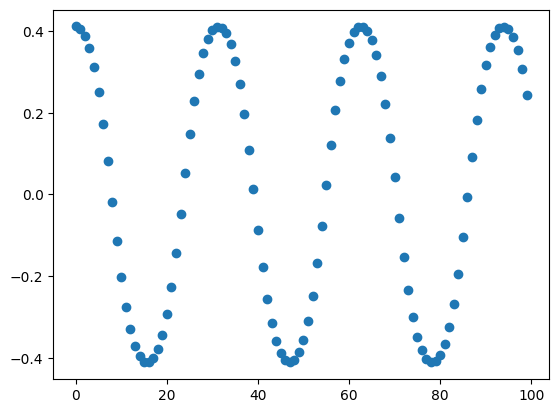

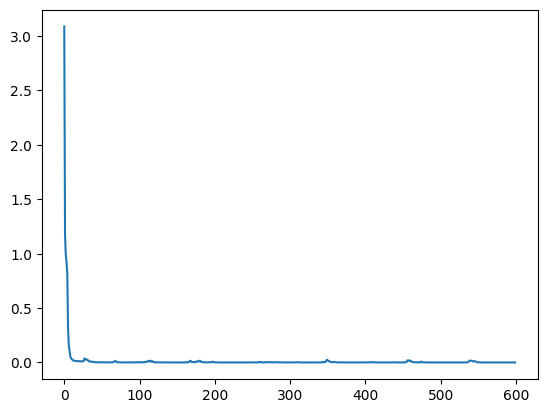

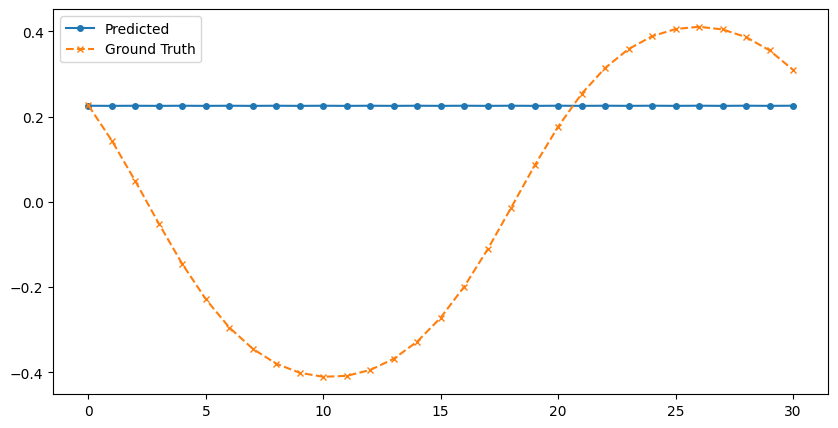

In [4]:
from matplotlib import pyplot as plt

plt.plot(jnp.arange(100), x_train[:100, 0], 'o')
plt.show()

plt.plot(losses)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(predicted_trajectory[:, 0], 'o-', label='Predicted', markersize=4)
plt.plot(ground_truth[:, 0], 'x--', label='Ground Truth', markersize=4)
plt.legend()
plt.show()